# Librerias

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from joblib import dump

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

<a href='https://www.kaggle.com/competitions/titanic/data?select=test.csv'>Link al Dataset</a>

In [5]:
df_train = pd.read_csv('../data/original/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test = pd.read_csv('../data/original/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)
df.shape

(1309, 12)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


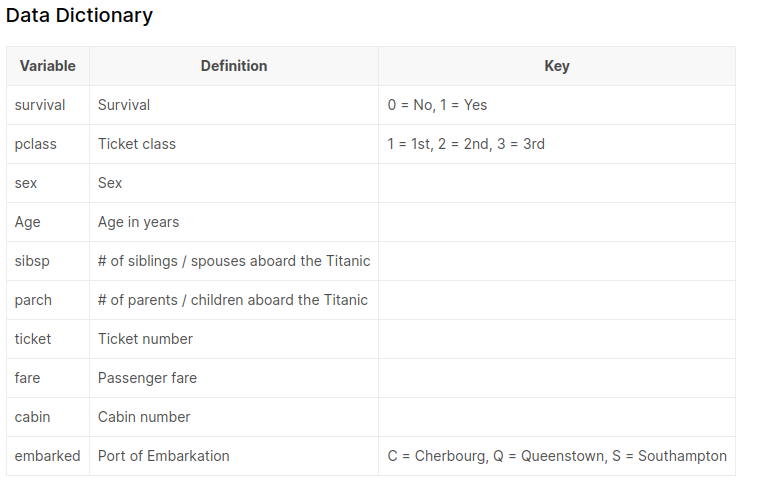

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [22]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [25]:
df.Pclass.unique()

array([3, 1, 2])

Guardamos nuestro df del train

In [71]:
dump(df_train, '../data/processed/datos.df')

['../data/processed/datos.df']

<div class="alert alert-success h2" role="alert">
    <h1>EDA</h1>
</div>

<Figure size 800x500 with 0 Axes>

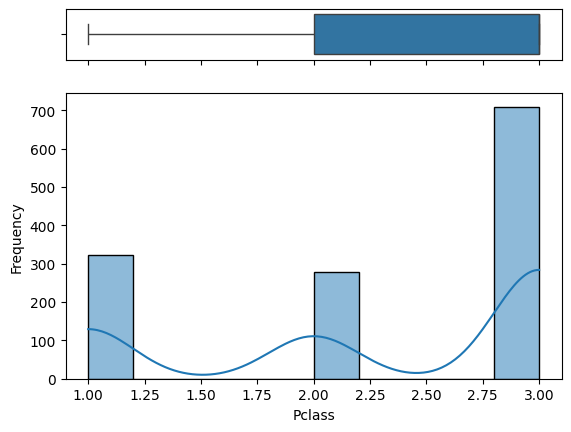

<Figure size 800x500 with 0 Axes>

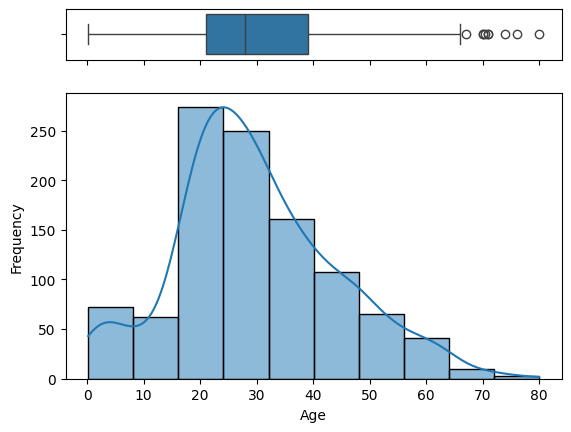

<Figure size 800x500 with 0 Axes>

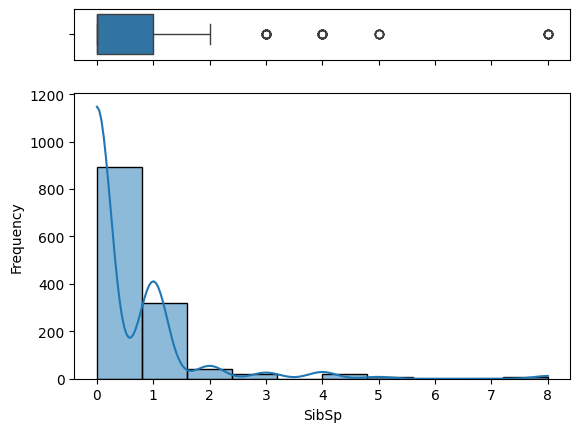

<Figure size 800x500 with 0 Axes>

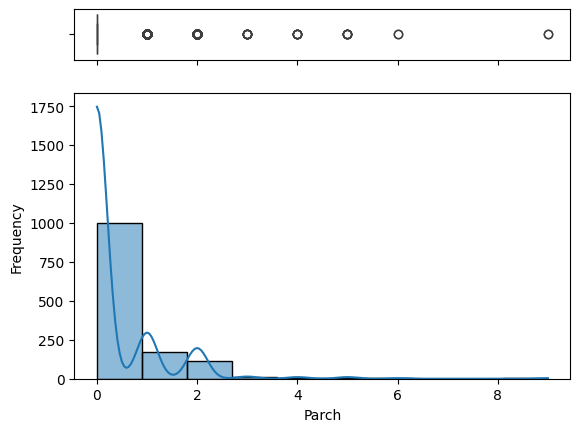

<Figure size 800x500 with 0 Axes>

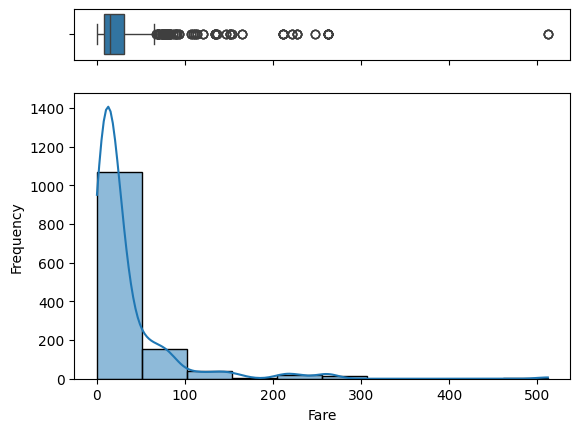

<Figure size 800x500 with 0 Axes>

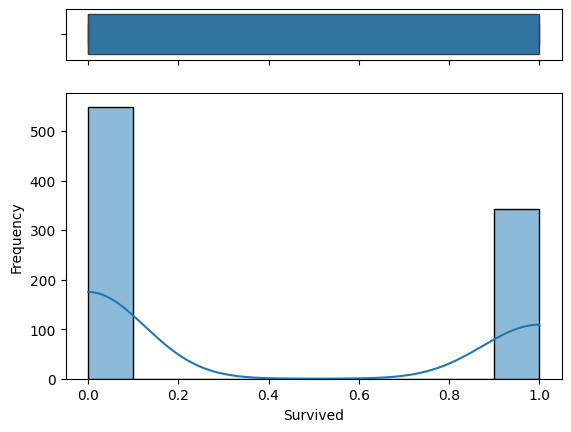

In [27]:
columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

for i in columns:
    plt.figure(figsize=(8, 5))

    filtered_data = df[df[i].notna()]
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x=filtered_data[i], orient="h", ax=ax_box, linewidth=1.0)
    sns.histplot(filtered_data[i], ax=ax_hist, bins=10, kde=True)
    
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=i)
    
    plt.gca().set(xlabel= i,ylabel='Frequency')
    plt.show()

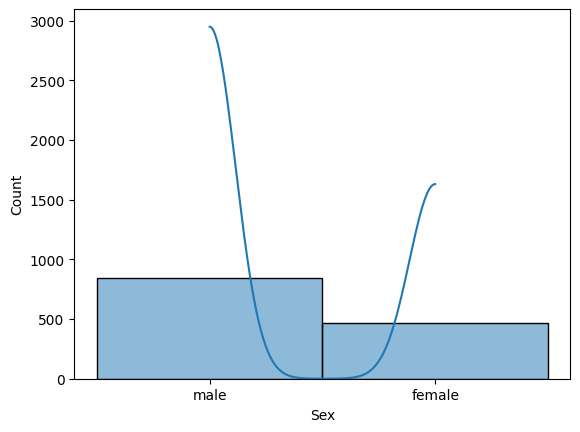

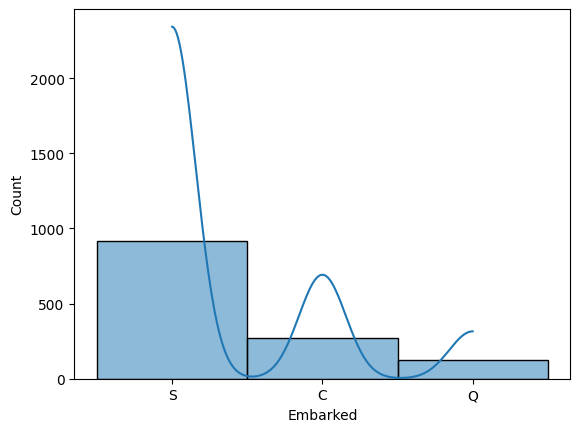

In [28]:
for i in df[['Sex', 'Embarked']]:
    plt.figure()
    sns.histplot(df[i] , bins = 10,kde=True)

In [29]:
fig = px.scatter(df, x='Fare', y='Age', color='Pclass', title='Diagrama de dispersión por Clase')

fig.update_layout(coloraxis_colorbar=dict(
    title='Clase',
    tickvals=[1, 2, 3],
    ticktext=['Clase 1', 'Clase 2', 'Clase 3']
))

In [30]:
px.histogram(df, x='Age', color='Pclass', title='Histograma de Edades por Clase')

In [34]:
px.box(df_train, x="Pclass", y="Fare", color="Survived", title='Clase y costo del pasaje según supervivencia')

In [42]:
fig = px.bar(df_train.groupby(['Pclass', 'Survived'])['Fare'].mean().reset_index(), x='Pclass', y='Fare', color='Survived', title='Gráfico de Barras con la Media del Precio por Clase')
fig.update_xaxes(dtick=1)
fig.show()

In [201]:
px.pie(df, names='Sex', title='Gráfico de Torta de Proporción de Género')

In [43]:
df.Fare[(df['Pclass'] == 1)&(df['Embarked']=='S')].max()

np.float64(263.0)

In [44]:
fig = px.scatter(df[(df['Pclass'] == 1)&(df['Embarked']=='S')], x='Age', y='Fare', animation_frame='Fare',
                 title='Relación entre Edad, Tarifa y Clase 1 de quienes embarcaron en S')
fig.update_layout(xaxis_title='Edad', yaxis_title='Tarifa')
fig.update_layout(xaxis=dict(range=[0, 80]), yaxis=dict(range=[0, df.Fare[(df['Pclass'] == 1)&(df['Embarked']=='S')].max()+10]))
fig.update_traces(marker=dict(size=18, opacity=0.5))
fig.show()

# Transformaciones

<div class="alert alert-warning" role="alert">
    <h3>Variables numéricas</h3>
    Ya vimos que no son normales y algunas tienen outliers
</div>

In [48]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        ('robust', RobustScaler())
    ]
)

<div class="alert alert-warning" role="alert">
    <h3>Variables categóricas</h3>
    Sex en binaria y OneHotEncoder para Embarked
</div>

In [50]:
categorical_features_bin = ['Sex']
categorical_transformer_bin = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'constant', fill_value = -1)),
        ('ordinalEncoder', OrdinalEncoder())
    ]
)

categorical_features = ['Embarked']
categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder(sparse_output=False))
    ]
)

<div class="alert alert-warning" role="alert">
    <h3>Pipeline</h3>
    Utilizamos ColumnTransformer para todas las variables escojidas
</div>

In [51]:
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('categorical_bin', categorical_transformer_bin, categorical_features_bin),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

<div class="alert alert-success" role="alert">
    <h1>Modelos</h1>
    <p>Utilizaremos pipeline</p>
</div>

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
X = df_train.drop('Survived', axis = 1)
y = df_train.Survived

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
y_train.value_counts()

Survived
0    439
1    273
Name: count, dtype: int64

In [61]:
y_test.value_counts()

Survived
0    110
1     69
Name: count, dtype: int64

### RF

Ejemplo individual

In [62]:
rfc = RandomForestClassifier(random_state = 42)
pipeline = Pipeline([
            ('preprocessing', preprocessor),
            ('model', rfc)
        ])

In [63]:
pipeline.fit(X_train, y_train)
print('R2 score: {0:.2f}'.format(pipeline.score(X_test, y_test)))

R2 score: 0.81


In [64]:
pipeline.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

In [65]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categoricals',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Embarked']),
                                                 ('categorical_bin',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(fill_value=-1,
                                                                                 strategy='constant')),
                                                                  ('ordinalEncoder',
                                                                   OrdinalEncoder())]),
                                                  ['Sex']),
                                                 ('numericals',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare', 'Pclass'])])),
                ('model', RandomForestClassifier(random_state=42))])

### Bucle
Miramos los modelos entrenados con el train y con los parámetros por defecto

In [66]:
lda = LinearDiscriminantAnalysis()
knc = KNeighborsClassifier()
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state = 42)
svc = SVC(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)
lr = LogisticRegression(random_state=42)

In [67]:
modelos = {
    'lda': lda,
    'knc': knc,
    'gnb' : gnb,
    'dtc' : dtc,
    'svc' : svc,
    'rfc' : rfc,
    'lr' : lr
}

In [68]:
data_y = {}
metrics = []

for name, model in modelos.items():
    pipeline = Pipeline([
            ('preprocessing', preprocessor),
            ('model', model)
        ])
    pipeline.fit(X_train, y_train)
     
    data_y[name] = pipeline.predict(X_test)

    metrics.append({
        'Modelo': name,
        'Score': pipeline.score(X_test, y_test)
    })

df_y = pd.DataFrame(data_y)
df_metrics = pd.DataFrame(metrics)

In [69]:
df_y['y_test'] = y_test.reset_index(drop=True)

In [72]:
dump(df_metrics, '../data/processed/df_metrics.df')

['../data/processed/df_metrics.df']

Text(0, 0.5, 'Densidad')

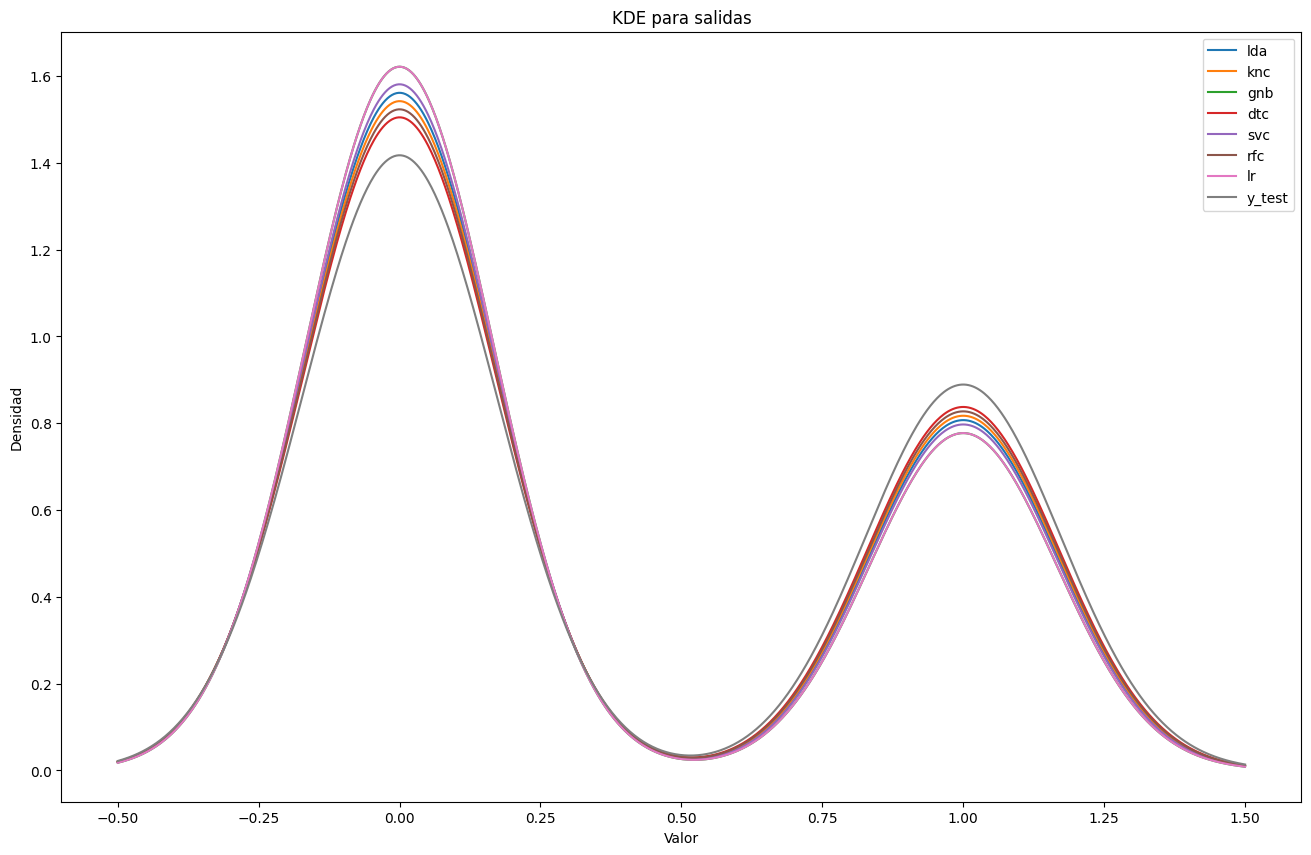

In [73]:
fig, ax = plt.subplots(figsize=(16, 10))
df_y.plot.kde(ax=ax)
plt.title('KDE para salidas')
plt.xlabel('Valor')
plt.ylabel('Densidad')

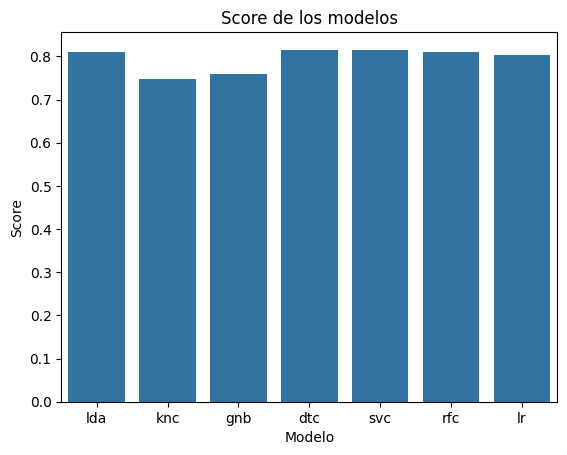

In [74]:
sns.barplot(data=df_metrics, x = 'Modelo', y = 'Score')
plt.title('Score de los modelos');

In [107]:
df_metrics

,Modelo,Score
0,lda,0.810056
1,knc,0.748603
2,gnb,0.759777
3,dtc,0.815642
4,svc,0.815642
5,rfc,0.810056
6,lr,0.804469


<div class="alert alert-warning" role="alert">
    <h1>Mejor modelo</h1>
    Buscando el mejor modelo con parámetros por defecto
</div>

In [75]:
evaluation = pd.DataFrame({'model':['lda','knc','gnb','dtc','svc','rfc','lr']})

## CV

In [76]:
models = [lda, knc, gnb, dtc, svc, rfc, lr]
score_mean = []
score_std = []

for model in models:
    pipeline = Pipeline(
        [
            ('preprocessing', preprocessor),
            ('model', model)
        ]
    )
    score = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
    score_mean.append(score.mean())
    score_std.append(score.std())

In [77]:
evaluation['f1_cv'] = score_mean
evaluation['f1_std_cv'] = score_std
evaluation

,model,f1_cv,f1_std_cv
0,lda,0.715874,0.029714
1,knc,0.715517,0.033763
2,gnb,0.690209,0.079464
3,dtc,0.697299,0.044114
4,svc,0.754508,0.021976
5,rfc,0.748667,0.037896
6,lr,0.715768,0.027929


## GS: Top 3

Los 3 mejores modelos los seleccionamos para buscar sus mejores hiperparametros

In [80]:
top_3 = {'svc': 
            {'model': SVC(verbose=False), 
             'params': {
                'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                'model__gamma': ['scale', 'auto'],
                'model__decision_function_shape': ['ovo', 'ovr'],
                'model__verbose': [True, False],
                'model__shrinking': [True, False],
                'model__probability': [True, False],
                'model__C': [0.01, 0.1, 0.5, 1, 2, 10, 100],
                'model__random_state': [42]
                }
            }, 
        'rfc': 
            {'model': RandomForestClassifier(random_state=42),
            'params': {
                'model__criterion': ['gini', 'entropy', 'log_loss'],
                'model__max_features': ['sqrt', 'log2', None],
                'model__bootstrap': [True, False],
                'model__class_weight': ['balanced', 'balanced_subsample', None],
                'model__random_state': [42]
                }
            },
        'lr':
            {'model': LogisticRegression(random_state=42),
             'params': {
                'model__penalty': ['l1', 'l2', 'elasticnet', None],
                'model__dual': [True, False],
                'model__C': [0.01, 0.1, 0.5, 1, 2, 10, 100],
                'model__fit_intercept': [True, False],
                'model__class_weight': [None, 'balanced'],
                'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                'model__multi_class': ['auto', 'ovr', 'multinomial'],
                'model__warm_start': [True, False],
                'model__random_state': [42]
                }
            }
        }

In [84]:
for name, mp in top_3.items():
    pipeline = Pipeline(
        [
            ('preprocessing', preprocessor),
            ('model', mp['model'])
        ]
    )
    
    gs = GridSearchCV(pipeline, mp['params'], cv = 5, scoring = ['f1', 'accuracy'], refit = 'f1', n_jobs = -1)
    
    gs.fit(X_train, y_train)
    
    print(f'Model: best_model_{name}')
    score = gs.best_score_
    print(f'best_score_{name}: {score:.3f}\n')
    params = gs.best_params_
    print(f'best_parameter_set_{name}: {params}\n')
    y_pred = gs.predict(X_test)
    print(f'Scores: {classification_report(y_test, y_pred)}\n')
    print('------------------------------------------------------\n')

    globals()[f"best_model_{name}"] = gs.best_estimator_
    globals()[f"best_score_{name}"] = score
    globals()[f"best_parameter_set_{name}"] = params
    globals()[f"y_pred_{name}"] = y_pred

[LibSVM]Model: best_model_svc
best_score_svc: 0.750

best_parameter_set_svc: {'model__C': 1, 'model__decision_function_shape': 'ovo', 'model__gamma': 'auto', 'model__kernel': 'rbf', 'model__probability': True, 'model__random_state': 42, 'model__shrinking': True, 'model__verbose': True}

Scores:               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179


------------------------------------------------------

Model: best_model_rfc
best_score_rfc: 0.735

best_parameter_set_rfc: {'model__bootstrap': True, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_features': None, 'model__random_state': 42}

Scores:               precision    recall  f1-score   support

           0       0.83      0.86      0.84    

## Best
Seleccionamos nuestro mejor modelo

In [85]:
df_scores = pd.DataFrame({
    'Modelo':['svc', 'rfc', 'lr'],
    'Score': [best_score_svc, best_score_rfc, best_score_lr]
})
df_scores

,Modelo,Score
0,svc,0.749570
1,rfc,0.734661
2,lr,0.745160


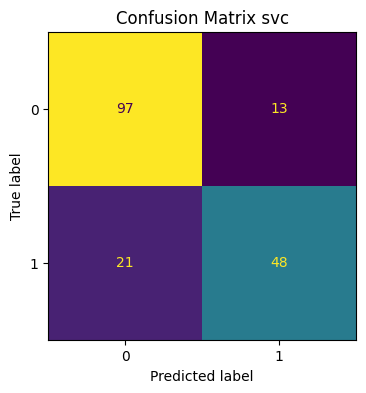

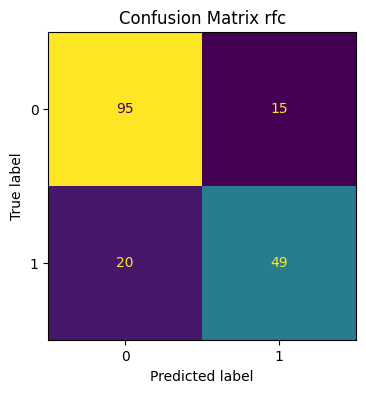

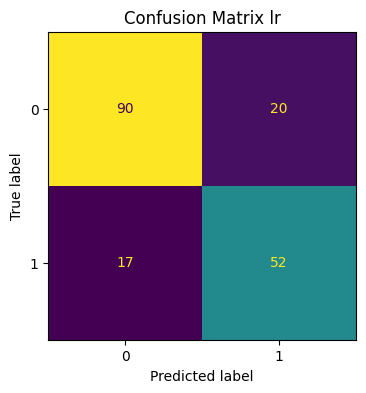

In [ ]:
for name in list(df_scores['Modelo']):
    cm = confusion_matrix(y_test, globals()[f"y_pred_{name}"])

    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(f'Confusion Matrix {name}')
    plt.show()

In [90]:
df_scores

,Modelo,Score
0,svc,0.749570
1,rfc,0.734661
2,lr,0.745160


In [91]:
df_y['y_pred_best'] = y_pred_lr

In [92]:
dump(df_y, '../data/processed/df_y.df')

['../data/processed/df_y.df']

# Test
Nueva predicción:

In [93]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
df_test.loc[[2]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [ ]:
best_model_lr.predict(df_test.loc[[2]])

array([0])

In [103]:
df_train.loc[[9]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [104]:
best_model_lr.predict(df_train.loc[[9]])

array([1])

Guardamos nuestro mejor modelo entrenado para poder utilizarlo

In [105]:
dump(best_model_lr, '../models/best_model.joblib')

['../models/best_model.joblib']

In [106]:
df_train.PassengerId.max()

np.int64(891)